### FLIPKART REVIEW _SENTIMENT ANALYSIS

### 1. Import Libraries and Datasets


In [4]:
#1.Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
import re
warnings.filterwarnings('ignore')


In [5]:
#Try different encodings
df = pd.read_csv("C:\\Users\\D.SURESH KUMAR\\Desktop\\archive1\\Dataset.csv", encoding='latin1')

In [6]:
# 3. Check for Null Values
print(df.isnull().sum())
df.dropna(inplace=True)

Product_name      15
Price             16
rating            16
reviews           22
Summary         2022
dtype: int64


### Data Cleaning- Lowercase Conversion, Remove Unwanted Characters, Stemming, and Stopwords Removal:

In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])
    return text

df['cleaned_reviews'] = df['reviews'].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\D.SURESH
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


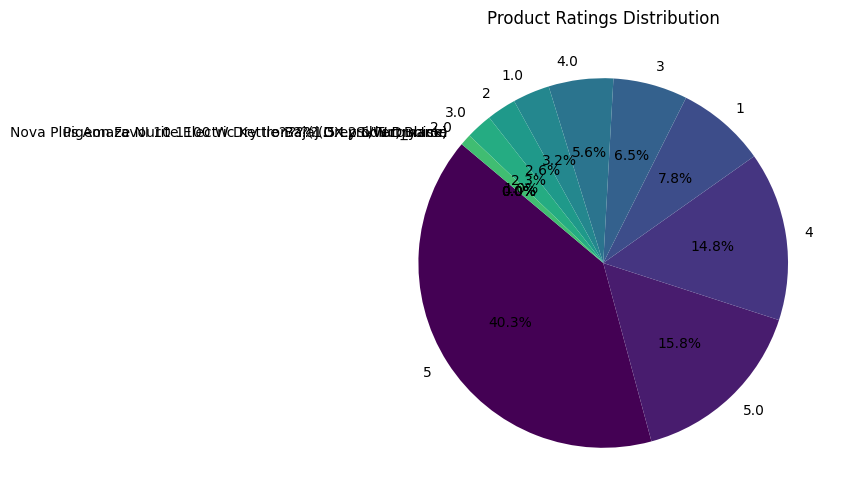

In [8]:
# Plotting Rates
plt.figure(figsize=(8, 6))
df['rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Product Ratings Distribution')
plt.ylabel('')
plt.show()


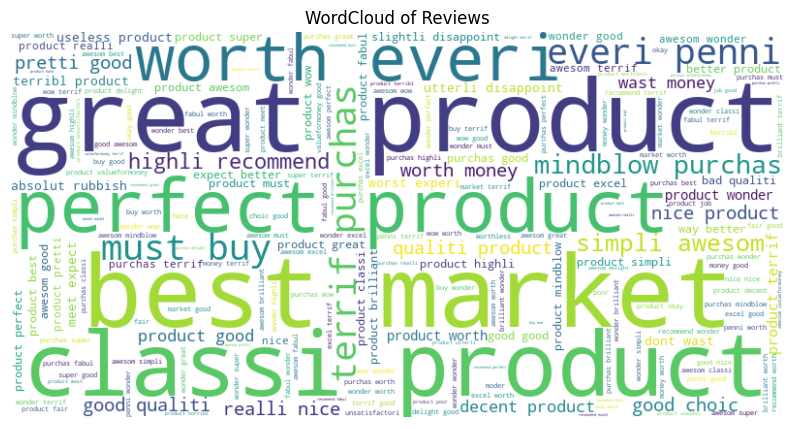

In [9]:
# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_reviews']))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Reviews')
plt.show()

### Sentiment Analysis- Sentiment Scores using SentimentIntensityAnalyzer:

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(review):
    return sia.polarity_scores(review)

# Assuming 'df' is your DataFrame and 'cleaned_reviews' is the column with the reviews
df['sentiment_scores'] = df['cleaned_reviews'].apply(get_sentiment_scores)

# Split the sentiment_scores dictionary into separate columns
df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)

# Categorize sentiment
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to C:\Users\D.SURESH
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Conclusion- Compute Overall Sentiment Scores:

sentiment
positive    52.902958
neutral     41.078799
negative     6.018243
Name: proportion, dtype: float64


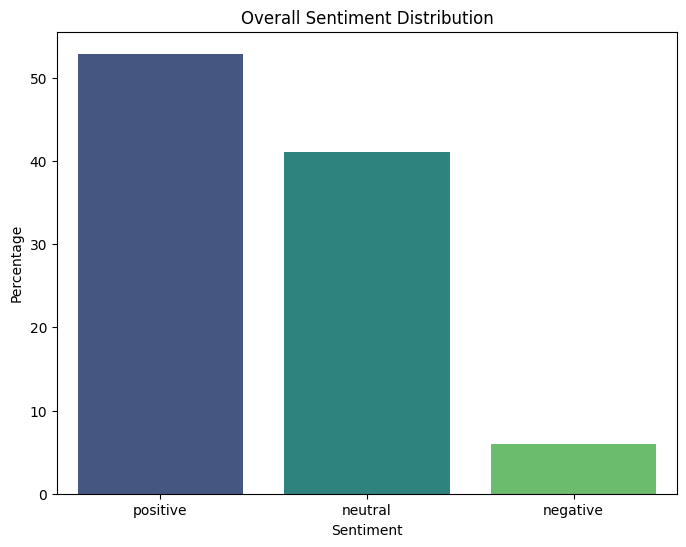

In [11]:
overall_sentiment = df['sentiment'].value_counts(normalize=True) * 100
print(overall_sentiment)

# Visualizing overall sentiment
plt.figure(figsize=(8, 6))
sns.barplot(x=overall_sentiment.index, y=overall_sentiment.values, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()
